In [1]:
import pandas as pd

sentiment = pd.read_csv("../data/fear_greed_index.csv")
trader = pd.read_csv("../data/historical_data.csv")

print(sentiment.shape)
print(trader.shape)

print("Sentiment Missing:\n", sentiment.isnull().sum())
print("Trader Missing:\n", trader.isnull().sum())

print("Trader Duplicates:", trader.duplicated().sum())



(2644, 4)
(211224, 16)
Sentiment Missing:
 timestamp         0
value             0
classification    0
date              0
dtype: int64
Trader Missing:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64
Trader Duplicates: 0


In [2]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
trader['Timestamp'] = pd.to_numeric(trader['Timestamp'], errors='coerce')

trader['date'] = pd.to_datetime(
    trader['Timestamp'],
    unit='ms'   
).dt.date

sentiment['date'] = sentiment['date'].dt.date


In [3]:
merged = trader.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

print(merged.head())
merged.to_csv("C:\\Users\\aprat\\.vscode\\HELLOWORLD\\Trader-Sentiment-Analysis\\data\\merged_data.csv", index=False)


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [4]:
daily_pnl = merged.groupby(['Account','date'])['Closed PnL'].sum().reset_index()
print(daily_pnl.head())
merged['win'] = merged['Closed PnL'] > 0
win_rate = merged.groupby('Account')['win'].mean().reset_index()
print(win_rate.head())
avg_leverage = merged.groupby('Account')['Size USD'].mean().reset_index()
print(avg_leverage.head())
trades_per_day = merged.groupby(['Account','date']).size().reset_index(name='trade_count')
print(trades_per_day.head())

                                      Account        date    Closed PnL
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-10-27 -3.275059e+05
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2025-02-19  1.927736e+06
2  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  2024-10-27  2.060745e+04
3  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  2025-02-19  1.709873e+04
4  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  2025-06-15  1.017915e+04
                                      Account       win
0  0x083384f897ee0f19899168e3b1bec365f52a9012  0.359612
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  0.442720
2  0x271b280974205ca63b716753467d5a371de622ab  0.301917
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  0.438585
4  0x2c229d22b100a7beb69122eed721cee9b24011dd  0.519914
                                      Account      Size USD
0  0x083384f897ee0f19899168e3b1bec365f52a9012  16159.576734
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   1653.226327
2  0x271b280974205ca63b716753467d5a371de622ab   8893

In [5]:
fear_greed_stats = merged.groupby('classification')['Closed PnL'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    'max'
]).reset_index()

print(fear_greed_stats)
fear_greed_stats.to_csv(r"C:\Users\aprat\.vscode\HELLOWORLD\Trader-Sentiment-Analysis\outputs\fear_vs_greed_summary.csv", index=False)



  classification   count       mean  median          std           min  \
0  Extreme Greed    6962  25.418772     0.0   306.166937  -21524.40000   
1           Fear  133871  50.047622     0.0   909.121796  -35681.74723   
2          Greed   36289  87.894859     0.0  1148.343968 -117990.10410   
3        Neutral    7141  22.229713     0.0   633.704815  -18360.67007   

            max  
0    2500.95750  
1  135329.09010  
2   44223.45187  
3   18282.19011  


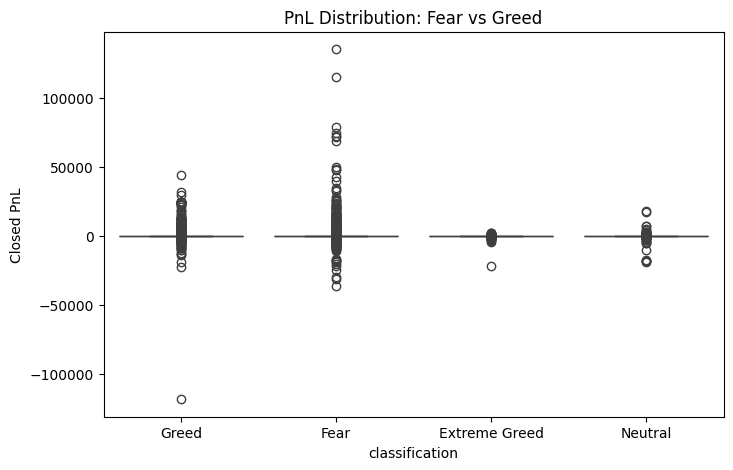

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x='classification', y='Closed PnL')
plt.title("PnL Distribution: Fear vs Greed")
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x='classification', y='Closed PnL')
plt.title("PnL Distribution: Fear vs Greed")
plt.savefig(r"C:\Users\aprat\.vscode\HELLOWORLD\Trader-Sentiment-Analysis\outputs\pnl_distribution.png")
plt.close()




In [7]:
merged['win'] = merged['Closed PnL'] > 0

win_rate = merged.groupby('classification')['win'].mean().reset_index()

print(win_rate)
win_rate.to_csv(r"C:\Users\aprat\.vscode\HELLOWORLD\Trader-Sentiment-Analysis\outputs\win_rate_by_sentiment.csv", index=False)


  classification       win
0  Extreme Greed  0.490089
1           Fear  0.415146
2          Greed  0.446471
3        Neutral  0.317182


In [8]:
trade_freq = merged.groupby('classification').size().reset_index(name='trade_count')

print(trade_freq)


  classification  trade_count
0  Extreme Greed         6962
1           Fear       133871
2          Greed        36289
3        Neutral         7141


In [9]:
merged['Size USD'] = pd.to_numeric(merged['Size USD'], errors='coerce')

avg_size = merged.groupby('classification')['Size USD'].mean().reset_index()

print(avg_size)


  classification     Size USD
0  Extreme Greed  5660.265764
1           Fear  5259.977837
2          Greed  3182.883845
3        Neutral  3058.848110


In [10]:
long_short = merged.groupby(['classification','Side']).size().reset_index(name='count')

print(long_short)


  classification  Side  count
0  Extreme Greed   BUY   3371
1  Extreme Greed  SELL   3591
2           Fear   BUY  66081
3           Fear  SELL  67790
4          Greed   BUY  15421
5          Greed  SELL  20868
6        Neutral   BUY   3505
7        Neutral  SELL   3636


In [11]:
import numpy as np

trader_activity = merged.groupby('Account').size().reset_index(name='total_trades')

median_trades = trader_activity['total_trades'].median()

trader_activity['segment'] = np.where(
    trader_activity['total_trades'] >= median_trades,
    'Frequent',
    'Infrequent'
)

merged = merged.drop(columns=['segment'], errors='ignore')

merged = merged.merge(
    trader_activity[['Account','segment']],
    on='Account',
    how='left'
)

segment_perf = (
    merged
    .groupby(['segment','classification'])['Closed PnL']
    .mean()
    .reset_index()
)

segment_perf.to_csv("../outputs/frequent_infrequent_performance.csv", index=False)

print(segment_perf)


      segment classification  Closed PnL
0    Frequent  Extreme Greed   26.658319
1    Frequent           Fear   46.013950
2    Frequent          Greed   70.575898
3    Frequent        Neutral    4.055615
4  Infrequent  Extreme Greed  -48.382749
5  Infrequent           Fear   75.639873
6  Infrequent          Greed  234.886424
7  Infrequent        Neutral  356.722004


In [12]:
import numpy as np

merged['win'] = merged['Closed PnL'] > 0

account_win_rate = (
    merged
    .groupby('Account')['win']
    .mean()
    .reset_index()
)

account_win_rate['win'] = account_win_rate['win'].round(2)
print("Trader Type Distribution:")

account_win_rate['type'] = np.where(
    account_win_rate['win'] > 0.6,
    'Consistent',
    'Inconsistent'
)

merged = merged.drop(columns=['type'], errors='ignore')

merged = merged.merge(
    account_win_rate[['Account', 'type']],
    on='Account',
    how='left'
)

segment_analysis = (
    merged
    .groupby(['type', 'classification'])['Closed PnL']
    .mean()
    .reset_index()
)

print(account_win_rate.head())
print(account_win_rate['type'].value_counts())
print(segment_analysis)
segment_analysis.to_csv(r"C:\Users\aprat\.vscode\HELLOWORLD\Trader-Sentiment-Analysis\outputs\segment_analysis.csv", index=False)


Trader Type Distribution:
                                      Account   win          type
0  0x083384f897ee0f19899168e3b1bec365f52a9012  0.36  Inconsistent
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  0.44  Inconsistent
2  0x271b280974205ca63b716753467d5a371de622ab  0.30  Inconsistent
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  0.44  Inconsistent
4  0x2c229d22b100a7beb69122eed721cee9b24011dd  0.52  Inconsistent
type
Inconsistent    31
Consistent       1
Name: count, dtype: int64
           type classification  Closed PnL
0    Consistent  Extreme Greed   61.769840
1    Consistent           Fear   27.882916
2    Consistent          Greed   36.935366
3    Consistent        Neutral    0.027120
4  Inconsistent  Extreme Greed   -2.773933
5  Inconsistent           Fear   50.887051
6  Inconsistent          Greed   89.362691
7  Inconsistent        Neutral   22.248383


In [13]:
total_pnl = merged.groupby('Account')['Closed PnL'].sum().reset_index()

median_pnl = total_pnl['Closed PnL'].median()

total_pnl['pnl_segment'] = np.where(
    total_pnl['Closed PnL'] >= median_pnl,
    'High PnL',
    'Low PnL'
)
print(total_pnl)
total_pnl.to_csv(r"C:\Users\aprat\.vscode\HELLOWORLD\Trader-Sentiment-Analysis\outputs\high_low_pnl_traders.csv", index=False)


                                       Account    Closed PnL pnl_segment
0   0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06    High PnL
1   0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04     Low PnL
2   0x271b280974205ca63b716753467d5a371de622ab -7.043619e+04     Low PnL
3   0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.324648e+05    High PnL
4   0x2c229d22b100a7beb69122eed721cee9b24011dd  1.686580e+05    High PnL
5   0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891 -3.120360e+04     Low PnL
6   0x39cef799f8b69da1995852eea189df24eb5cae3c  1.445692e+04     Low PnL
7   0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6  5.349625e+04     Low PnL
8   0x420ab45e0bd8863569a5efbb9c05d91f40624641  1.995056e+05    High PnL
9   0x430f09841d65beb3f27765503d0f850b8bce7713  4.165419e+05    High PnL
10  0x47add9a56df66b524d5e2c1993a43cde53b6ed85  1.033437e+05     Low PnL
11  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  6.777471e+05    High PnL
12  0x4f93fead39b70a1824f981a54d4e55b278e9f760  3.0

Actionable Insights

1. Fear Regimes Require Stronger Risk Control

The analysis shows that PnL outcomes during Fear periods are much more volatile compared to other sentiment states. Both large profits and large losses occur more frequently when the market is fearful. This indicates unstable trading conditions and higher uncertainty.

From a trading perspective, this means that risk increases significantly during Fear regimes.

Actionable takeaway:
During Fear days, traders should reduce position size and avoid aggressive scaling. Risk management should be tightened by using stricter stop-loss rules and limiting exposure per trade. A volatility-adjusted position sizing approach can help control drawdowns during these unstable conditions.

2. Greed Periods Encourage Overtrading Without Clear Performance Improvement

The results suggest that trading activity increases during Greed periods, but average profitability does not improve proportionally. This indicates that traders may be increasing activity due to positive sentiment rather than a measurable edge.

This behavior increases downside risk without guaranteed return improvement.

Actionable takeaway:
During Greed regimes, trade frequency should be controlled instead of expanded. Position size or leverage should only be increased if recent win rate and performance metrics justify it. Avoid increasing exposure purely based on optimistic market sentiment.

3. Extreme Greed May Signal Reduced Risk-Adjusted Opportunity

The distribution of returns during Extreme Greed appears more compressed compared to Fear. This suggests that markets may be in a mature trend phase where opportunity dispersion is lower and risk-adjusted returns may decline.

In such conditions, aggressive breakout trading may offer limited advantage.

Actionable takeaway:
During Extreme Greed, traders should moderate overall exposure and focus on selective, high-probability setups. It may also be beneficial to increase profit-taking discipline and avoid chasing extended trends without volatility confirmation.

Strategy Idea 1: Sentiment-Based Dynamic Risk Adjustment

The analysis shows that Fear regimes produce higher volatility and amplify losses for inconsistent traders. This indicates that risk exposure should not remain constant across sentiment states.

Rule of Thumb:

During Fear days:

Reduce position size by 25–40%.

Limit trading activity for traders with win rate < 60%.

Tighten stop-loss thresholds.

During Greed days:

Maintain controlled exposure instead of increasing leverage.

This ensures capital preservation during unstable sentiment regimes.

Strategy Idea 2: Performance-Based Capital Allocation

Segment analysis shows that High PnL and Consistent traders remain more stable across sentiment regimes, while Low PnL and Inconsistent traders experience larger drawdowns.

Rule of Thumb:

Allocate higher capital weight to historically High PnL traders during volatile regimes.

Reduce exposure to Low PnL traders during Fear periods.

Allow increased trade frequency only for traders with proven consistent win rates.

This creates a sentiment-aware portfolio allocation framework rather than uniform exposure.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

daily_pnl = (
    merged
    .groupby(['Account','date','classification'])['Closed PnL']
    .sum()
    .reset_index()
)

daily_pnl['profitable'] = (daily_pnl['Closed PnL'] > 0).astype(int)

daily_trades = (
    merged
    .groupby(['Account','date'])
    .size()
    .reset_index(name='trade_count')
)

daily_pnl = daily_pnl.merge(daily_trades, on=['Account','date'], how='left')

le = LabelEncoder()
daily_pnl['sentiment_encoded'] = le.fit_transform(daily_pnl['classification'])

X = daily_pnl[['sentiment_encoded','trade_count']]
y = daily_pnl['profitable']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.75      1.00      0.86        18

    accuracy                           0.75        24
   macro avg       0.38      0.50      0.43        24
weighted avg       0.56      0.75      0.64        24



C:\Users\aprat\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aprat\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aprat\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

            Closed PnL       win      Size USD   trade_count
cluster                                                     
0        955963.386103  0.398961  14150.207714  14940.714286
1        115092.796929  0.317379   4546.315337   4820.153846
2        175750.740053  0.498279   2841.682205   3664.750000


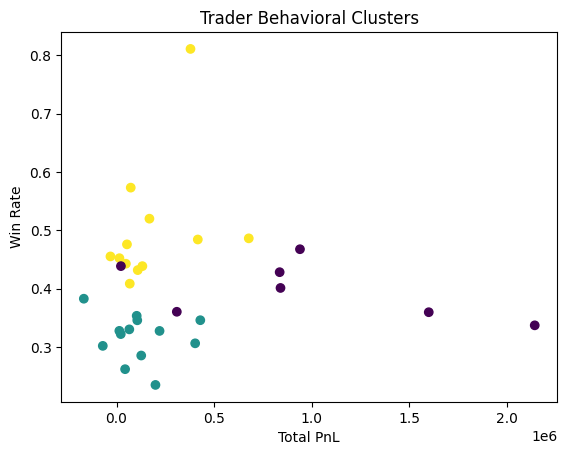

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

merged['Closed PnL'] = pd.to_numeric(merged['Closed PnL'], errors='coerce')
merged['Size USD'] = pd.to_numeric(merged['Size USD'], errors='coerce')

merged['win'] = (merged['Closed PnL'] > 0).astype(int)

trader_features = merged.groupby('Account').agg({
    'Closed PnL': 'sum',
    'win': 'mean',
    'Size USD': 'mean'
}).reset_index()

trade_counts = merged.groupby('Account').size().reset_index(name='trade_count')

trader_features = trader_features.merge(trade_counts, on='Account')

trader_features = trader_features.dropna()

X = trader_features[['Closed PnL','win','Size USD','trade_count']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
trader_features['cluster'] = kmeans.fit_predict(X_scaled)

print(trader_features.groupby('cluster').mean(numeric_only=True))

plt.scatter(trader_features['Closed PnL'], trader_features['win'], c=trader_features['cluster'])
plt.xlabel("Total PnL")
plt.ylabel("Win Rate")
plt.title("Trader Behavioral Clusters")
plt.show()
